In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from constrains import ALL_TYPES, GALAXY_TYPES
import csv

In [3]:
df_map = pd.read_csv('/data/images/gz2_filename_mapping.csv')
df_full = pd.read_csv('/data/images/gz2_hart16.csv')
df_full = df_full.rename(columns={'dr7objid':'objid'})
df_classes = df_full[ALL_TYPES]

## Histyogram for every question in Galaxy Zoo2

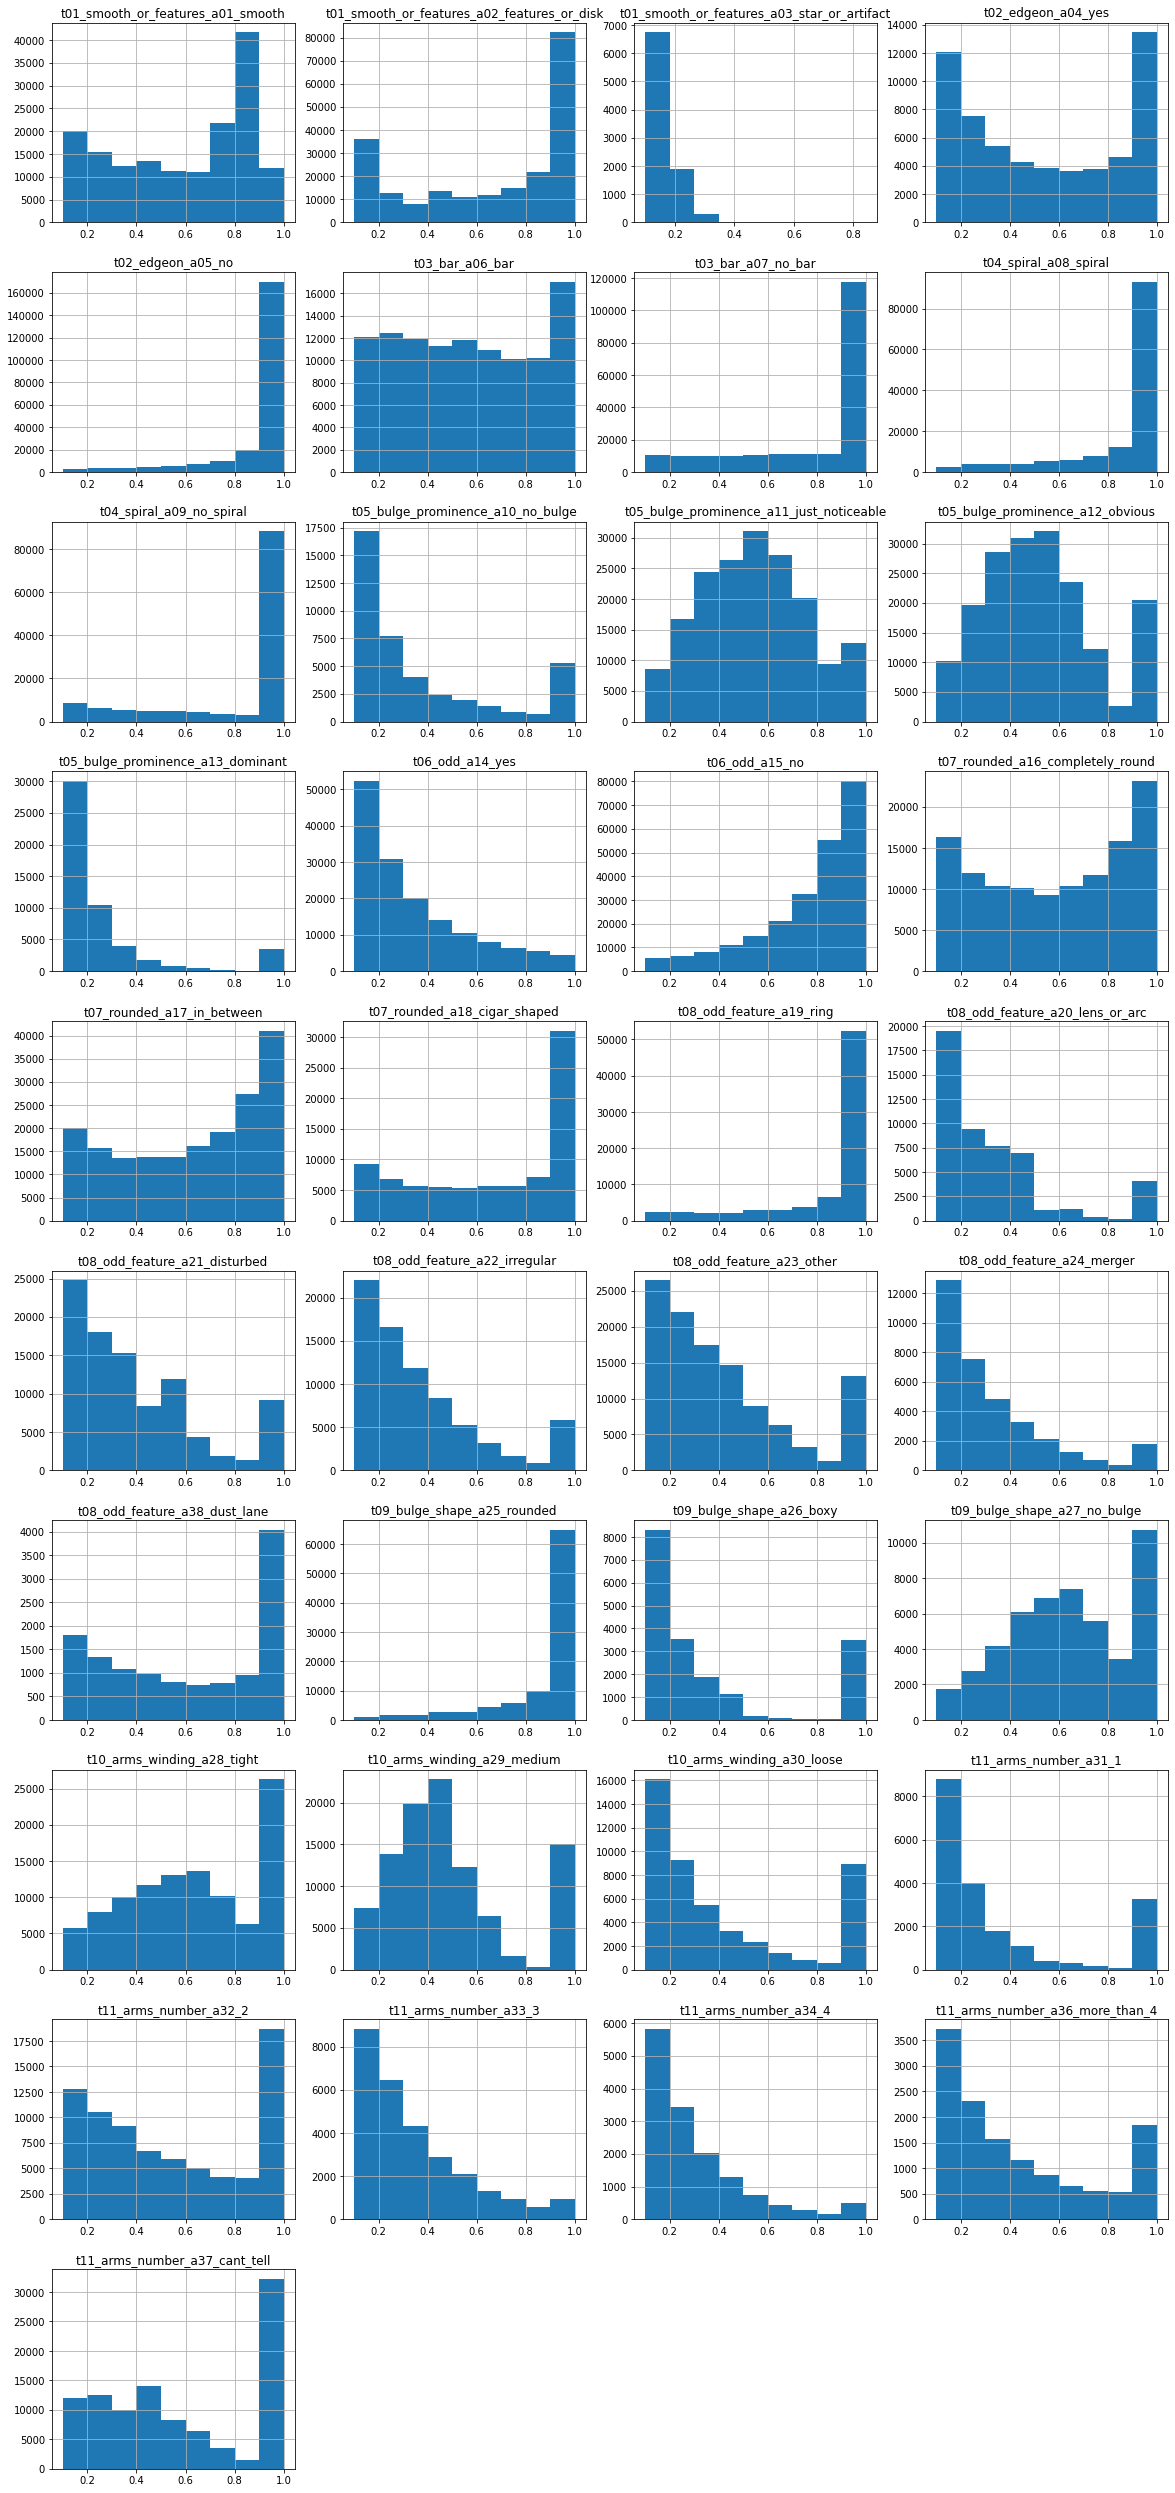

In [43]:
fig = plt.figure(figsize=(20,45))
plt.subplots_adjust(hspace=0.25) #Cambia la forma
for galaxy_type, index in zip(df_classes, range(1,38)):
    fig.add_subplot(10, 4, index)
    df_classes[galaxy_type][df_classes[galaxy_type] >= 0.1].hist(bins=9)
    plt.gca().set_title(galaxy_type[:-9])
fig.savefig("/data/images/plots/histogram_for_every_type_of_galaxy.jpg", dpi=256, bbox_inches='tight')
plt.show()

In [51]:
print('Total of registers in gz2_hart16: ', df_full['objid'].count())
df_full.head()

Total of registers in gz2_hart16:  239695


,objid,ra,dec,rastring,decstring,sample,gz2_class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
0,587732591714893851,179.042984,60.522518,11:56:10.32,+60:31:21.1,original,Sc+t,45,342,0,...,0.450,0.450,0.482646,0,16,16.0,0.400,0.400,0.394506,0
1,588009368545984617,135.084396,52.494240,09:00:20.26,+52:29:39.3,original,Sb+t,42,332,1,...,0.512,0.503,0.504833,0,13,13.0,0.317,0.323,0.322743,0
2,587732484359913515,183.371979,50.741508,12:13:29.27,+50:44:29.4,original,Ei,36,125,28,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
3,587741723357282317,186.251953,28.558598,12:25:00.47,+28:33:31.0,original,Sc+t,28,218,1,...,0.240,0.240,0.241322,0,6,6.0,0.240,0.240,0.239765,0
4,587738410866966577,161.086395,14.084465,10:44:20.73,+14:05:04.1,original,Er,43,151,33,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0


In [45]:
print('Total of registers in mapping: ', df_map['objid'].count())
df_map.head()

Total of registers in mapping:  355990


,objid,sample,asset_id
0,587722981736120347,original,1
1,587722981736579107,original,2
2,587722981741363294,original,3
3,587722981741363323,original,4
4,587722981741559888,original,5


In [20]:
df_match = df_map.merge(df_full, on='objid', how='right')
print(df_match['asset_id'].count())
df_match['asset_id'] = df_match['asset_id'].astype('string') + '.jpg'
print('Total of registers after join: ', df_map['objid'].count())
df_match.head()

239695
Total of registers after join:  355990


,objid,sample_x,asset_id,ra,dec,rastring,decstring,sample_y,gz2_class,total_classifications,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
0,587732591714893851,original,58957.jpg,179.042984,60.522518,11:56:10.32,+60:31:21.1,original,Sc+t,45,...,0.450,0.450,0.482646,0,16,16.0,0.400,0.400,0.394506,0
1,588009368545984617,original,193641.jpg,135.084396,52.494240,09:00:20.26,+52:29:39.3,original,Sb+t,42,...,0.512,0.503,0.504833,0,13,13.0,0.317,0.323,0.322743,0
2,587732484359913515,original,55934.jpg,183.371979,50.741508,12:13:29.27,+50:44:29.4,original,Ei,36,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
3,587741723357282317,original,158501.jpg,186.251953,28.558598,12:25:00.47,+28:33:31.0,original,Sc+t,28,...,0.240,0.240,0.241322,0,6,6.0,0.240,0.240,0.239765,0
4,587738410866966577,original,110939.jpg,161.086395,14.084465,10:44:20.73,+14:05:04.1,original,Er,43,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0


## Galaxy types distribution

In [21]:
def assign_class(df, threshold=0.70):
    """return SET OF DATAFRAMES"""
    galaxy_types = {}
    #Pink
    odd_yes = df['t06_odd_a14_yes_debiased'] > 0.70
    galaxy_types['ring'] = df['asset_id'][odd_yes & (df['t08_odd_feature_a19_ring_debiased'] > threshold)]
    #galaxy_types['lens_or_arc'] = df['asset_id'][odd_yes & (df['t08_odd_feature_a20_lens_or_arc_debiased'] > threshold)]
    #galaxy_types['disturbed'] = df['asset_id'][odd_yes & (df['t08_odd_feature_a21_disturbed_debiased'] > threshold)]
    galaxy_types['irregular'] = df['asset_id'][odd_yes & (df['t08_odd_feature_a22_irregular_debiased'] > threshold)]
    galaxy_types['merger'] = df['asset_id'][odd_yes & (df['t08_odd_feature_a24_merger_debiased'] > threshold)]
    #galaxy_types['dust_lane'] = df['asset_id'][odd_yes & (df['t08_odd_feature_a38_dust_lane_debiased'] > threshold)]

    #Red
    odd_no = df['t06_odd_a15_no_debiased']> 0.85
    edgeon_yes = df['t02_edgeon_a04_yes_debiased'] > 0.85

    galaxy_types['rounded'] = df['asset_id'][odd_no & edgeon_yes & (df['t09_bulge_shape_a25_rounded_debiased'] > 0.90)]
    #galaxy_types['boxy'] = df['asset_id'][odd_no & edgeon_yes & (df['t09_bulge_shape_a26_boxy_debiased'] > 0.70)]
    galaxy_types['no_bulge'] = df['asset_id'][odd_no & edgeon_yes & (df['t09_bulge_shape_a27_no_bulge_debiased'] > 0.90)]

    #Orange
    edgeon_no = df['t02_edgeon_a05_no_debiased'] > 0.85
    no_spiral = odd_no & edgeon_no &(df['t04_spiral_a09_no_spiral_debiased'] > 0.85)
    galaxy_types['no_central_bulge'] = df['asset_id'][no_spiral &
                                                      (df['t05_bulge_prominence_a10_no_bulge_debiased'] > threshold)]
    galaxy_types['dominant'] = df['asset_id'][no_spiral & (df['t05_bulge_prominence_a13_dominant_debiased'] > threshold)]

    #Green
    spiral_yes = odd_no & edgeon_no & (df['t04_spiral_a08_spiral_debiased'] > 0.85)
    galaxy_types['tight'] = df['asset_id'][spiral_yes & (df['t10_arms_winding_a28_tight_debiased'] > threshold)]
    galaxy_types['medium'] = df['asset_id'][spiral_yes & (df['t10_arms_winding_a29_medium_debiased'] > threshold)]
    galaxy_types['loose'] = df['asset_id'][spiral_yes & (df['t10_arms_winding_a30_loose_debiased'] > threshold)]

    #Yellow
    smooth = odd_no & (df['t01_smooth_or_features_a01_smooth_debiased'] > 0.85)
    galaxy_types['completely_round'] = df['asset_id'][smooth &
                                                      (df['t07_rounded_a16_completely_round_debiased'] > 0.90)]
    galaxy_types['in_between'] = df['asset_id'][smooth & (df['t07_rounded_a17_in_between_debiased'] > 0.90)]
    galaxy_types['cigar_shaped'] = df['asset_id'][smooth & (df['t07_rounded_a18_cigar_shaped_debiased'] > 0.90)]

    #black
    bar = edgeon_no & (df['t03_bar_a06_bar_debiased'] > 0.85) & (df['t01_smooth_or_features_a02_features_or_disk_debiased'] > 0.85)
    galaxy_types['bar'] = df['asset_id'][bar]
    return galaxy_types

In [73]:
def assign_class_2(df):
    """return SET OF DATAFRAMES"""
    tr_prev = 0.70
    tr_class = 0.75
    galaxy_types = {}

    smooth = df['t01_smooth_or_features_a01_smooth_debiased'] > tr_prev
    features_or_disk = df['t01_smooth_or_features_a02_features_or_disk_debiased'] > tr_prev

    edgeon_yes = features_or_disk & (df['t02_edgeon_a04_yes_debiased'] > tr_prev)
    edgeon_no = features_or_disk & (df['t02_edgeon_a05_no_debiased'] > tr_prev)

    spiral_yes = edgeon_no & (df['t04_spiral_a08_spiral_debiased'] > tr_prev)

    odd_yes = df['t06_odd_a14_yes_debiased'] > tr_prev


    #Pink
    galaxy_types['ring'] = df['asset_id'][odd_yes & (df['t08_odd_feature_a19_ring_debiased'] > tr_class)]

    #Red
    galaxy_types['rounded'] = df['asset_id'][edgeon_yes & (df['t09_bulge_shape_a25_rounded_debiased'] > tr_class)]
    galaxy_types['no_bulge'] = df['asset_id'][edgeon_yes & (df['t09_bulge_shape_a27_no_bulge_debiased'] > tr_class)]

    #Green
    galaxy_types['tight'] = df['asset_id'][spiral_yes & (df['t10_arms_winding_a28_tight_debiased'] > tr_class)]
    galaxy_types['medium'] = df['asset_id'][spiral_yes & (df['t10_arms_winding_a29_medium_debiased'] > tr_class)]
    galaxy_types['loose'] = df['asset_id'][spiral_yes & (df['t10_arms_winding_a30_loose_debiased'] > tr_class)]

    #Yellow
    galaxy_types['completely_round'] = df['asset_id'][smooth &
                                                      (df['t07_rounded_a16_completely_round_debiased'] > tr_class)]
    galaxy_types['in_between'] = df['asset_id'][smooth & (df['t07_rounded_a17_in_between_debiased'] > tr_class)]
    galaxy_types['cigar_shaped'] = df['asset_id'][smooth & (df['t07_rounded_a18_cigar_shaped_debiased'] > tr_class)]
    return galaxy_types

In [22]:
def galaxies_distribution(galaxy_classes):
    distribution = {}
    for key, value in galaxy_classes.items():
        distribution[key] = len(value)
    return distribution

In [45]:
def plot_distribution(distribution, title):
    galaxy_types = list(distribution.keys())
    number_galaxies = list(distribution.values())
    figure = plt.figure(figsize=(15, 8))
    plt.title(fontsize=15, label=title)
    ax = figure.add_subplot(1,1,1)
    ax.set_xticklabels(galaxy_types, rotation=90,  fontsize=12)
    plt.bar(range(len(distribution)),number_galaxies,tick_label=galaxy_types)
    plt.savefig("/data/images/plots/"+title+".jpg", bbox_inches='tight', dpi=100)
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


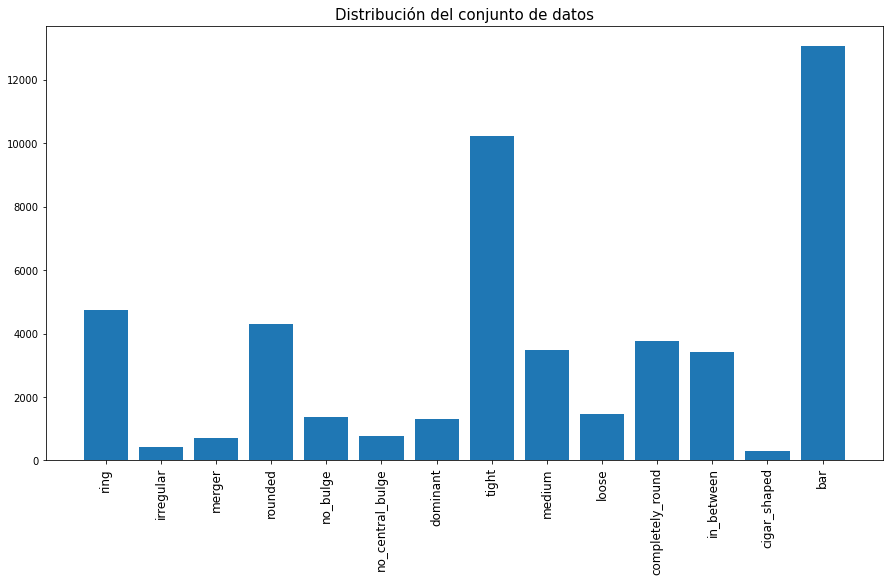

In [66]:
galaxy_classes = assign_class(df_match)
distribution = galaxies_distribution(galaxy_classes)
plot_distribution(distribution, 'Distribución del conjunto de datos')

In [49]:
def down_sampling(galaxy_types):
    used_images = set()
    estimated_images = 0 #Use for find overlapping
    for galaxy_type in GALAXY_TYPES:
        if galaxy_type in galaxy_types.keys():
            if len(galaxy_types[galaxy_type]) > 5000:
                galaxy_types[galaxy_type] = list(np.random.choice(galaxy_types[galaxy_type], 5000, replace=False))
            else:
                galaxy_types[galaxy_type] = galaxy_types[galaxy_type]
            used_images |= set(galaxy_types[galaxy_type])
            estimated_images += len(galaxy_types[galaxy_type])
            #print('Found ' + str(len(galaxy_types[galaxy_type])) + ' images for ' + galaxy_type + ' class')
    print('Total of images used for training: ', len(used_images),' estimated: ', estimated_images)
    return used_images

Total of images used for training:  34398  estimated:  36030


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


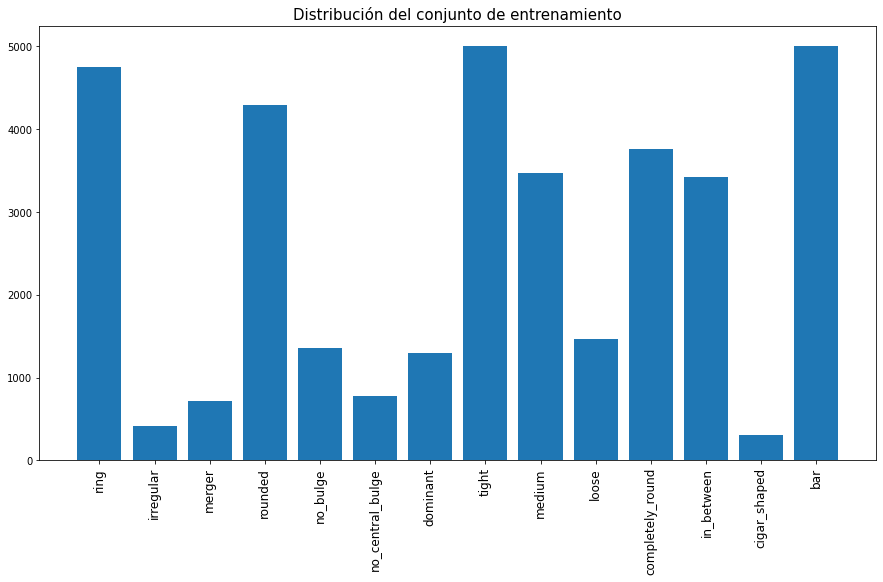

In [67]:
used_galaxies = galaxy_classes.copy()
_ = down_sampling(used_galaxies)
distribution_used = galaxies_distribution(used_galaxies)
plot_distribution(distribution_used, 'Distribución del conjunto de entrenamiento')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


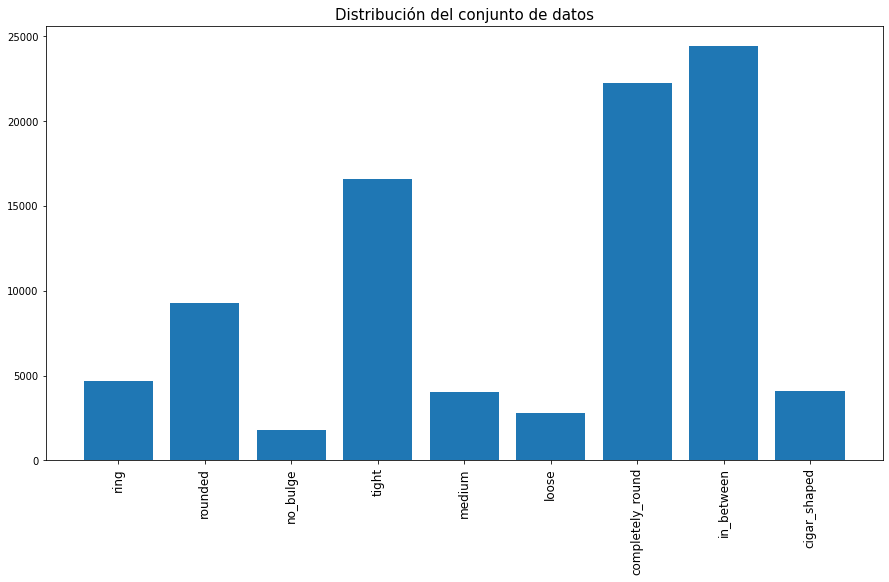

In [74]:
galaxy_classes = assign_class_2(df_match)
distribution = galaxies_distribution(galaxy_classes)
plot_distribution(distribution, 'Distribución del conjunto de datos')

In [75]:
def overlapping (dic_galaxy):
    dic_galaxy_c = dic_galaxy.copy()
    for key, value in dic_galaxy.items():
        for key_2, value_2 in dic_galaxy_c.items():
            op = len(set(value) & set(value_2))
            if op != 0:
                print('Overlapping between ', key,' and ', key_2,' is ', op)
        dic_galaxy_c.pop(key)

Overlapping between  ring  and  ring  is  4652
Overlapping between  ring  and  rounded  is  12
Overlapping between  ring  and  tight  is  566
Overlapping between  ring  and  medium  is  117
Overlapping between  ring  and  loose  is  78
Overlapping between  ring  and  completely_round  is  52
Overlapping between  ring  and  in_between  is  35
Overlapping between  ring  and  cigar_shaped  is  4
Overlapping between  rounded  and  rounded  is  9284
Overlapping between  rounded  and  no_bulge  is  316
Overlapping between  rounded  and  in_between  is  5
Overlapping between  rounded  and  cigar_shaped  is  52
Overlapping between  no_bulge  and  no_bulge  is  1787
Overlapping between  no_bulge  and  cigar_shaped  is  9
Overlapping between  tight  and  tight  is  16592
Overlapping between  tight  and  completely_round  is  207
Overlapping between  tight  and  in_between  is  222
Overlapping between  tight  and  cigar_shaped  is  42
Overlapping between  medium  and  medium  is  4052
Overlapping

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


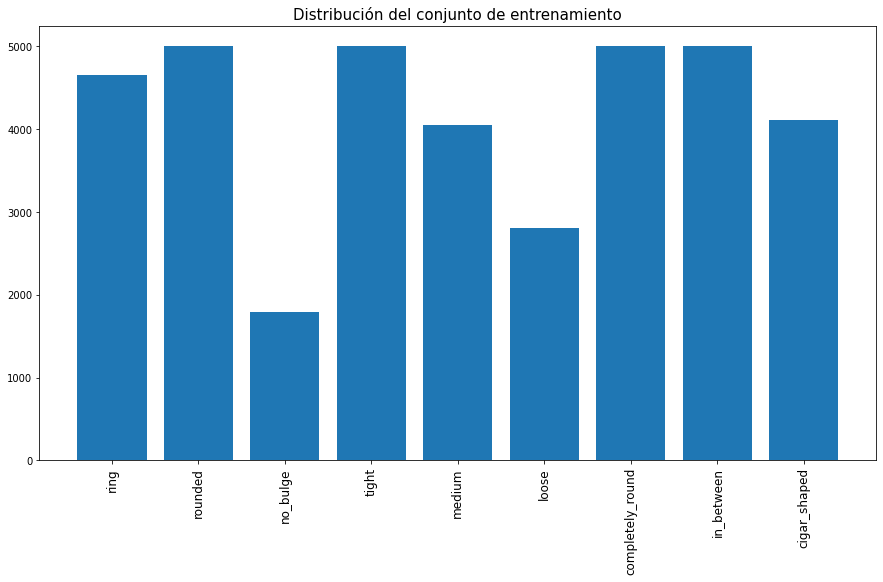

In [76]:
used_galaxies = galaxy_classes.copy()
overlapping(used_galaxies)
_ = down_sampling(used_galaxies)
distribution_used = galaxies_distribution(used_galaxies)
plot_distribution(distribution_used, 'Distribución del conjunto de entrenamiento')